<a href="https://colab.research.google.com/github/Iris-Agape/PT/blob/main/ML_vib_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import pandas as pd
import numpy as np

# for normalization
from sklearn import preprocessing

# for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# for data imbalance, SMOTE
from imblearn.over_sampling import SMOTE
from scipy import stats

# to calculate the performance of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
import sys
!time pip install rdkit-pypi


real	0m4.619s
user	0m4.420s
sys	0m0.147s


In [ ]:
try:
  from rdkit import Chem
  from rdkit.Chem import Draw
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [ ]:
# load the training data and save it in the variable "train"
train=pd.read_csv('https://raw.githubusercontent.com/elizabeththrall/MLforPChem/main/MLforvibspectroscopy/Data/binary_train.csv',index_col=0)
# load the test data and save it in the variable "test"
test=pd.read_csv('https://raw.githubusercontent.com/elizabeththrall/MLforPChem/main/MLforvibspectroscopy/Data/binary_test.csv',index_col=0)

In [ ]:
# display the contents of the variable "train"
train

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054,...,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
1,CCCCCC=O,hexanal,1,0.000121,0.000126,0.000131,0.000136,0.000141,0.000146,0.000151,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012,...,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
3,c1cn[se]c1,12-selenazole,0,0.000243,0.000244,0.000245,0.000246,0.000248,0.000249,0.000251,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
4,CCC(C)=CC(C)C,3E-24-dimethylhex-3-ene,0,0.000053,0.000053,0.000053,0.000054,0.000054,0.000054,0.000054,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,c1c[nH]cn1,imidazole,0,0.001059,0.001111,0.001166,0.001222,0.001282,0.001343,0.001406,...,0.000019,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000017,0.000017,0.000017
2100,C=C[Si](C)(Cl)Cl,methyl-vinyl-dichlorosilane,0,0.001328,0.001328,0.001327,0.001326,0.001324,0.001323,0.001322,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2101,CCC=CCl,1E-1-chloro-1-butene,0,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
2102,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,perfluoro-n-pentane,0,0.000111,0.000114,0.000117,0.000121,0.000124,0.000128,0.000131,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


In [ ]:
# display the contents of the variable "test"
test

,SMILES,name,label,500,502,504,506,508,510,512,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,C1CCOCC1,tetrahydropyran,0,0.000040,0.000041,0.000041,0.000041,0.000041,0.000042,0.000043,...,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009
1,[N]=N=N[GeH3],germylazide,0,0.000301,0.000296,0.000290,0.000284,0.000278,0.000272,0.000266,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
2,CCC(C)=O,2-butanone,1,0.000048,0.000049,0.000050,0.000050,0.000051,0.000052,0.000053,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
3,CN=N=[N],methyl-azide,0,0.000024,0.000024,0.000025,0.000025,0.000026,0.000027,0.000027,...,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
4,CC(C)(C)S,2-methyl-2-propanethiol,0,0.000050,0.000051,0.000052,0.000053,0.000055,0.000056,0.000058,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CC(=O)Nc1ccc(O)cc1,acetaminophen,1,0.000310,0.000315,0.000320,0.000324,0.000327,0.000330,0.000332,...,0.000019,0.000018,0.000018,0.000018,0.000017,0.000017,0.000017,0.000017,0.000016,0.000016
229,CC1OCCO1,2-methyl-13-dioxolane,0,0.000063,0.000064,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
230,CC(C)(C)[Se]C(C)(C)C,2-methyl-2---2-methyl-2-propanyl-selanyl-propane,0,0.000067,0.000069,0.000071,0.000073,0.000074,0.000076,0.000077,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
231,CCCOCCC,dipropylether,0,0.000052,0.000053,0.000054,0.000055,0.000056,0.000056,0.000056,...,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008


In [ ]:
# this line of code returns the first three rows and first 10 columns of the training data
# to check whether we can fetch data or not
train.iloc[0:3,0:10]

,SMILES,name,label,500,502,504,506,508,510,512
0,COC1OCCO1,2-methoxy-13-dioxolane,0,0.000051,0.000051,0.000052,0.000052,0.000053,0.000053,0.000054
1,CCCCCC=O,hexanal,1,0.000121,0.000126,0.000131,0.000136,0.000141,0.000146,0.000151
2,CC1CCC(C)C1C,1R2R3S-123-trimethylcyclopentane,0,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012


In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=7
idx_notCarbonyl=23
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

Notice that the spectra span the same frequency range, but the maximum intensity value is different for each molecule.

In [ ]:
# define a function to perform min-max normalization
def df_normalize(df,i=3):
  """
  apply min-max_scaler to each rows
  since min-max scaler originally applies to columns,
  we will use transposed data and then update the data with transposed result
  """
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T

In [ ]:
# use the functional to normalize the training and test data
df_normalize(train)
df_normalize(test)

In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=7
idx_notCarbonyl=23
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:]
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:]
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [ ]:
# set threshold value
threshold=0.2

In [ ]:
# define a function to apply the threshold chosen above
def applyThreshold (dataframe,i=3):
  """
  i is the position of the start of the attributes
  """
  dataframe.iloc[:,i:]=np.where((dataframe.iloc[:,i:]< threshold),0,dataframe.iloc[:,i:])

In [ ]:
# use the function to apply the threshold to the training and test data
applyThreshold(train)
applyThreshold(test)

In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=7
idx_notCarbonyl=23
# get the data for the two molecules
hasCarbonyl=train.set_index('name').iloc[idx_hasCarbonyl,3:] # picked
notCarbonyl=train.set_index('name').iloc[idx_notCarbonyl,3:] # picked
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [ ]:
# define a function to split the column containing the label from the columns containing the attributes
def splitXY(dataframe,start_X=3,end_X=None,start_Y=2,end_Y=3):
  X=dataframe.iloc[:,start_X:end_X]
  # since current X is a dataframe structure, we use ".value" to only get values
  X=X.values
  Y=dataframe.iloc[:,start_Y:end_Y]
  # since current Y is a dataframe structure, we use ".value" to only get values
  Y=Y.values.ravel()
  # this makes sure all the labels are integers
  Y=Y.astype(float).astype(int)
  return X,Y

In [ ]:
# now apply the function to the normalized and thresholded train and test data
X,Y=splitXY(train)
X_test,Y_test=splitXY(test)

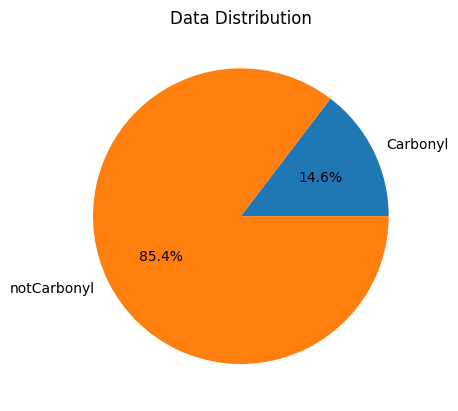

In [ ]:
# get the total number of molecules in the training data
total=len(Y)
# determine how many contain a carbonyl
label1=Y.sum()
# find the number without a carbonyl by subtraction
label0=total-label1
# plot the data
data=[label1,label0]
my_labels = 'Carbonyl','notCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

Molecules without a carbonyl dominate the training set, so the classes are imbalanced. Applying SMOTE to counter this

In [ ]:
%%capture
# define SMOTE method
sm = SMOTE(sampling_strategy='minority')
# apply SMOTE to the training data
X, Y= sm.fit_resample(X,Y)

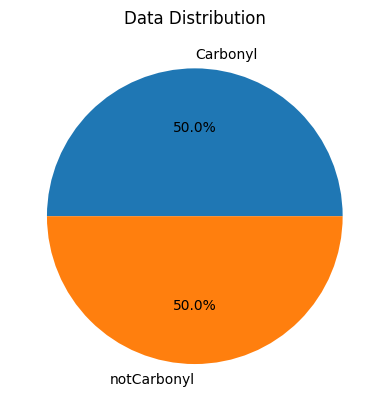

In [ ]:
# again determine the number of molecules with and without carbonyl groups and visualize
total=len(Y)
label1=Y.sum()
label0=total-label1
data=[label1,label0]
my_labels = 'Carbonyl','notCarbonyl'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.show()

Now the training data are balanced between the two classes. We can plot one of the new synthetic carbonyl-containing spectra for comparison to a real carbonyl-containing spectrum. (The synthetic spectrum will vary each time you run SMOTE.) Note that the synthetic spectra are stored at the end of the variable X, so any index value greater than the original length of the variable train corresponds to a synthetic spectrum.

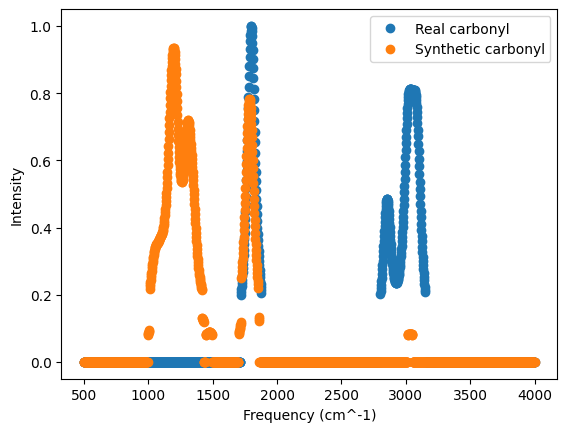

In [ ]:
# index values of a real and synthetic carbonyl (you can change these values to see other spectra)
idx_realCarbonyl=1 # this selects the molecule in row 1 of the training data (hexanal)
idx_synCarbonyl=len(train) # this selects the first synthetic carbonyl spectrum
# get the data for the two molecules
spectrum_realCarbonyl=X[idx_realCarbonyl,:]
spectrum_synCarbonyl=X[idx_synCarbonyl,:]
# get the frequencies for plotting
frequencies=range(500,4002,2)
# generate the plot
plt.plot(frequencies,spectrum_realCarbonyl,"o",label="Real carbonyl")
plt.plot(frequencies,spectrum_synCarbonyl,"o",label="Synthetic carbonyl")
plt.legend(loc="upper right")
plt.xlabel("Frequency (cm^-1)")
plt.ylabel("Intensity")
plt.show()

In [ ]:
# use the Random Forest algorithm with the default parameters
rf_clf=RandomForestClassifier()
# fit the model using the training dataset
rf_clf.fit(X,Y)

RandomForestClassifier()

In [ ]:
# use the Random Forest algorithm with the default parameters
kn_clf=KNeighborsClassifier()
# fit the model using the training dataset
kn_clf.fit(X,Y)

KNeighborsClassifier()

In [ ]:
# use the Random Forest algorithm with the default parameters
nb_clf=GaussianNB()
# fit the model using the training dataset
nb_clf.fit(X,Y)

GaussianNB()

In [ ]:
# use the fitted Decision Tree model to predict the labels (with or without carbonyl) for the test dataset
Y_pred=nb_clf.predict(X_test)

In [ ]:
# determine the accuracy, sensitivity, and specificity by comparing the predicted labels to the actual labels
nb_accuracy=np.round(accuracy_score(Y_test,Y_pred),2)
nb_sensitivity=np.round(recall_score(Y_test,Y_pred),2)
nb_specificity=np.round(recall_score(Y_test,Y_pred,pos_label=0),2)

# display the accuracy, sensitivity, and specificity
print("Accuracy: "+str(nb_accuracy)+" Sensitivity: "+str(nb_sensitivity)+" Specificity: "+str(nb_specificity))

Accuracy: 0.43 Sensitivity: 1.0 Specificity: 0.3


In [ ]:
# use the fitted Decision Tree model to predict the labels (with or without carbonyl) for the test dataset
Y_pred=kn_clf.predict(X_test)

In [ ]:
# determine the accuracy, sensitivity, and specificity by comparing the predicted labels to the actual labels
kn_accuracy=np.round(accuracy_score(Y_test,Y_pred),2)
kn_sensitivity=np.round(recall_score(Y_test,Y_pred),2)
kn_specificity=np.round(recall_score(Y_test,Y_pred,pos_label=0),2)

# display the accuracy, sensitivity, and specificity
print("Accuracy: "+str(kn_accuracy)+" Sensitivity: "+str(kn_sensitivity)+" Specificity: "+str(kn_specificity))

Accuracy: 0.96 Sensitivity: 1.0 Specificity: 0.95


In [ ]:
# use the Decision Tree algorithm with the default parameters
dt_clf=DecisionTreeClassifier()
# fit the model using the training dataset
dt_clf.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
# use the fitted Decision Tree model to predict the labels (with or without carbonyl) for the test dataset
Y_pred=dt_clf.predict(X_test)

In [ ]:
# determine the accuracy, sensitivity, and specificity by comparing the predicted labels to the actual labels
dt_accuracy=np.round(accuracy_score(Y_test,Y_ketone),2)
dt_sensitivity=np.round(recall_score(Y_test,Y_pred),2)
dt_specificity=np.round(recall_score(Y_test,Y_pred,pos_label=0),2)

# display the accuracy, sensitivity, and specificity
print("Accuracy: "+str(dt_accuracy)+" Sensitivity: "+str(dt_sensitivity)+" Specificity: "+str(dt_specificity))

NameError: ignored

In [ ]:
# use the fitted Random Forest model to predict the labels (with or without carbonyl) for the test dataset
Y_pred=rf_clf.predict(X_test)

In [ ]:
# determine the accuracy, sensitivity, and specificity by comparing the predicted labels to the actual labels
rf_accuracy=np.round(accuracy_score(Y_test,Y_pred),2)
rf_sensitivity=np.round(recall_score(Y_test,Y_pred),2)
rf_specificity=np.round(recall_score(Y_test,Y_pred,pos_label=0),2)

# display the accuracy, sensitivity, and specificity
print("Accuracy: "+str(rf_accuracy)+" Sensitivity: "+str(rf_sensitivity)+" Specificity: "+str(rf_specificity))

In [ ]:
# rerun the label prediction (change the line below to specify which model to use)
Y_pred=dt_clf.predict(X_test)

# create new variables to hold the indices (i.e., row number) of all FPs and FNs
fp=[]
fn=[]

# go through all predictions to identify the errors and then determine whether each one is an FP or FN
for i in range (len(Y_test)):
  # identify FPs and store their indices
  if Y_pred[i] != Y_test[i] and Y_test[i] ==0:
       fp.append(i)
  # identify FNs and store their indices
  elif Y_pred[i] != Y_test[i] and Y_test[i]==1:
       fn.append(i)

In [ ]:
# get the SMILES strings
fpmols=test.iloc[fp,0].values
# get the molecule name
fpmols_name=test.iloc[fp,1].values

# get the SMILES strings
fnmols=test.iloc[fn,0].values
# get the molecule names
fnmols_name=test.iloc[fn,1].values

# get lists of the FP and FN SMILES strings
fp_list = [Chem.MolFromSmiles(smiles) for smiles in fpmols]
fn_list = [Chem.MolFromSmiles(smiles) for smiles in fnmols]

In [ ]:
# set molecule names for the FP plot displayed below
for i in range(len(fp_list)):
  mol=fp_list[i]
  mol.SetProp("_Name",fpmols_name[i])

# set molecule names for the FN plot displayed below
for i in range(len(fn_list)):
  mol=fn_list[i]
  mol.SetProp("_Name",fnmols_name[i])

In [ ]:
# display a table showing the index, SMILES string, and name of all FPs
print('\033[1m' + 'FP List' + '\033[0m')
test.iloc[fp, 0:2]

In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=78
idx_notCarbonyl=182
# get the data for the two molecules
hasCarbonyl=test.set_index('name').iloc[idx_hasCarbonyl,3:] # picked
notCarbonyl=test.set_index('name').iloc[idx_notCarbonyl,3:] # picked
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [ ]:
# display the molecular structures of all FPs
img1=Chem.Draw.MolsToGridImage(fp_list,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fp_list])
img1

In [ ]:
# display a table showing the index, SMILES string, and name of all FNs
print('\033[1m' + 'FN List' + '\033[0m')
test.iloc[fn, 0:2]

In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=23
idx_notCarbonyl=211
# get the data for the two molecules
hasCarbonyl=test.set_index('name').iloc[idx_hasCarbonyl,3:] # picked
notCarbonyl=test.set_index('name').iloc[idx_notCarbonyl,3:] # picked
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [ ]:
# display the molecular structures of all FNs
img2=Chem.Draw.MolsToGridImage(fn_list,molsPerRow=4,subImgSize=(200,200),legends=[mol.GetProp('_Name') for mol in fn_list])
img2

In [ ]:
# change the index values below to pick molecules with and without a carbonyl
idx_hasCarbonyl=23
idx_1=183
idx_notCarbonyl=211

# get the data for the two molecules
hasCarbonyl=test.set_index('name').iloc[idx_hasCarbonyl,3:] # picked
notCarbonyl=test.set_index('name').iloc[idx_notCarbonyl,3:] # picked
notCarbonyl1=test.set_index('name').iloc[idx_1,3:] # picked
# plot the spectra
fig = go.Figure()
fig.add_trace(go.Scatter(x=hasCarbonyl.index, y=hasCarbonyl, name=hasCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl.index, y=notCarbonyl,name=notCarbonyl.name,mode='markers'))
fig.add_trace(go.Scatter(x=notCarbonyl1.index, y=notCarbonyl1,name=notCarbonyl1.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)

In [ ]:
# to display the spectrum of a FN
# in the line below, insert the index value of the molecule you want to see from the table above
fn_idx=183
# then display the figure
fn_mol=test.set_index('name').iloc[fn_idx,3:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fn_mol.index, y=fn_mol, name=fn_mol.name,mode='markers'))
fig.update_layout(title='Intensities over frequency',title_x=0.5)
fig.update_layout(showlegend=True)


In [ ]:
# create variables containing the performance metrics for each of the models
acs=[dt_accuracy,rf_accuracy,kn_accuracy,nb_accuracy]
sens=[dt_sensitivity,rf_sensitivity,kn_sensitivity,nb_sensitivity]
specs=[dt_specificity,rf_specificity,kn_specificity,nb_specificity]

In [ ]:
# make and display a DataFrame
d = {'Model':['Decision Tree','Random Forest','k-Nearest Neighbors','Naive Bayes'],'Accuracy':acs, 'Sensitivity':sens,' Specificity':specs}
result = pd.DataFrame(data=d)

In [ ]:
result